원문: Moler, Cleve B. [Numerical computing with MATLAB](https://www.mathworks.com/moler/chapters.html). Society for Industrial and Applied Mathematics, 2008.

뉴튼법으로 $f(x)=0$ 을 풀자면, 접선을 $f(x)$ 그래프로부터 아무 지점에서나 그리고 그 접선이 $x$축과 교차하는 점을 찾는다. 이 방식은 하나의 시작점 $x0$를 요구한다. 접선은 다음과 같이 구한다.

$$x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}$$

프로그램은 다음과 같다.

In [1]:
import math
eps = 4e-16


def newton(f, fprime, x):
    xprev = math.inf
    k = 0
    while abs(x - xprev) > eps * abs(x):
        xprev = x
        x += - f(x) /  fprime(x)
        k += 1
    
    return x

제곱근을 구하는 방법으로서 뉴튼 법은 특히 명쾌하고 효과적이다. $\sqrt M$ 을 계산하려면, 다음을 0으로 만드는 $x$를 찾는다.

$$f(x)=x^2-M$$

이 경우, $f'(x)=2x$ 이고

\begin{align}
x_{n+1}&= x_n - \frac{{x_n}^2-M}{2x_n} \\\
&= \frac{1}{2}(x_n+\frac{M}{x_n})
\end{align}

이다. 해당 알고리듬은 반복적으로 $x$와 $M/x$ 의 평균을 구한다. 해당 코드는 다음과 같다.

In [2]:
M = 2.0
x = 1.0

import math
xprev = math.inf
eps = 4e-16

while abs(x - xprev) > eps * abs(x):
    xprev = x
    x = 0.5 * (x + M/x)
    print('x = %.16g' % x)

x = 1.5
x = 1.416666666666667
x = 1.41421568627451
x = 1.41421356237469
x = 1.414213562373095
x = 1.414213562373095


뉴튼법은 단지 6번 반복한다. 사실, 5번만에 도달했지만 종결 조건에 도달하기 위해 6번째 반복이 필요했다.

뉴튼법이 제곱근의 경우에서 처럼 작동한다면, 매우 효과적이다. 이는 많은 강력한 수치 해법의 기반이다. 그러나, 범용 알고리듬으로서 어떤 함수를 0으로 만드는 $x$를 찾는데는 이 방법은 세가지 심각한 문제점을 가지고 있다.

* 함수 $f(x)$ 가 반드시 매끄러워야 한다.
* 미분 $f'(x)$를 계산하는 것이 편리하지 않을 수 있다.
* 그 첫 짐작 값이 그 최종 결과에 가까와야 한다.

원칙적으로는, 해당 미분 $f'(x)$ 계산은 어떤 알려진 기법인 *자동 미분* 으로 가능할 수도 있다. 어떠한 프로그래밍 언어로 작성된 함수 ``f(x)`` 또는 임의의 적당한 코드가 정의하는 것은 그 매개변수에 대한 수학적 함수이다.  현대 전산학 문법 분석 기법을 미적분학의 규칙, 특히 연쇄 법칙과 결합함으로써 이론적으로는 다른 함수 ``fprime(x)``을 위한 코드를 생성하여 $f'(x)$를 계산하는 것이 가능해 진다. 그러나, 그러한 기법을 실제로 구현하는 것은 상당히 복잡하여 아직 완전히 구현되지는 않았다.

뉴튼법의 국소 수렴 특성은 매우 흡인력이 강하다. $x_*$ 가 $f(x)$를 0으로 만든다고 하고 $e_n=x_n-x_*$ 이라고 하면, n번째 반복의 오류가 된다. 아래와 같이 가정하라.

* $f'(x)$ 와 $f''(x)$ 가 존재하고 연속이다.
* $x_0$ 는 $x_*$과 가깝다.

그렇다면 다음을 증명할 수 있다.

$$e_{n+1} = \frac{1}{2}\frac{f''(\xi)}{f'(x)}{e_n}^2$$

여기서 $\xi$는 어떤 점으로 $x_n$과 $x_*$의 사이에 있다. 바꾸어 말하면 다음과 같다.

$$e_{n+1} = O({e_n}^2)$$

이것은 *2차* 수렴이라고 한다. 매끄러운 함수의 경우, 일단 0으로 만드는 $x$값에 충분히 가까우면, 그 오차는 대략 제곱으로 반복때 마다 감소한다. 수치가 정확한 자릿수가 각 반복 횟수마다 거의 배가 되는 것이다. 우리가 $\sqrt2$ 에서 보았던 결과가 전형적이다.

국소 수렴 이론 아래 깔린 가정이 충족되지 않으면, 뉴튼법은 신뢰할 수 없을 수도 있다. $f(x)$ 의 첫번째 두번째 미분이 연속적이고 유한이 아니거나 그 시작점이 $f(x)$를 0으로 만드는 $x$에 가깝지 않다면, 국소이론은 적용되지 않고 느리게 수렴하거나 심지어 전혀 수렴하지 않을 수도 있다. 다음에는 어떤 일이 일어날 수 있는지 한 예를 들겠다.

우리가 뉴튼법을 무한 반복 시킬 수 있는지 보자. 반복식

$$x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}$$

이 앞뒤로 점 $a$ 주변을 반복한다는 것은 다음 경우이다.

$$x_{n+1}-a=-(x_n-a)$$

이는 만일 $f(x)$가 아래 조건을 만족 시키면 발생한다

$$x - a - \frac{f(x_n)}{f'(x_n)} = - (x -a) $$

이는 분리 가능한 상미분 방정식이다:

$$\frac{f'(x)}{f(x)} = \frac{1}{2(x -a)} $$

그 해는 다음과 같다.

$$f(x)=sign(x-a) \sqrt{|x-a|}$$

$f(x)$ 의 해는, 당연히, $x_*=a$ 에 있다. $f(x)$ 를 그려보자.

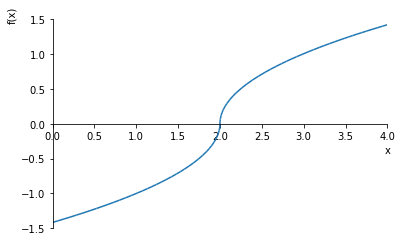

In [4]:
import sympy as sy


x = sy.symbols('x')
sy.plot(sy.sign(x - 2) * sy.sqrt(abs(x - 2)), (x, 0, 4))

해당 그래프의 어떠한 점에서도 접선을 그리면, 접선과 x 축이 $x=a$의 반대편에서 교차한다. 뉴턴법은 영원히 반복되고, 수렴하지도 발산하지도 않는다.

뉴튼법의 수렴 이론은 이 경우 성립되지 않는데, $x\rightarrow a$ 임에 따라 $f'(x)$ 가 발산하기 때문이다. 다음 절에서 설명할 알고리듬을 이 함수에 적용하는 것도 흥미로울 것이다.